In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
from __future__ import annotations
import numpy as np

from mflex.simulate.simulate_boundary import dipole

from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield
from mhsflex.vis import plot, plot_plasma_parameters
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt

from mflex.model.field.utility.poloidal import (
    phi,
    phi_low,
    phi_hypgeo,
    dphidz_hypgeo,
    dphidz,
    dphidz_low,
)

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

In [32]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 2.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 2.0
zmin = 0.0
zmax = 2.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 0.2
deltaz = 0.02

nf_max = 200

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y)

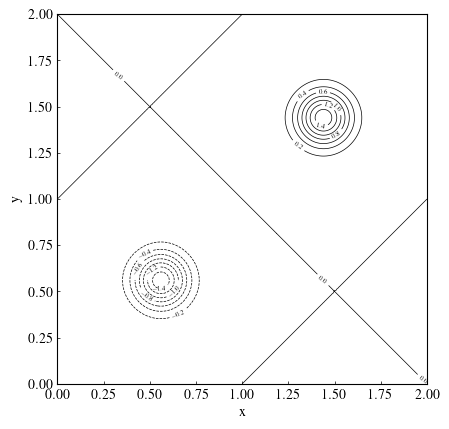

In [35]:
x_grid, y_grid = np.meshgrid(x_arr, y_arr)
folder = "/Users/lilli/Desktop/Thesis/Performance"
fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid,
    y_grid,
    data_bz,
    18,
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=5, inline=True)
ax.set_box_aspect(1)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/contour.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [4]:
data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nresol_x,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

In [21]:
a = 0.44
alpha = 0.5
b = 1.0

folder = "/Users/lilli/Desktop/Thesis/Performance/plots/MHS2"
folder2 = "/Users/lilli/Desktop/Thesis/Performance/plots_2F1/MHS2"

In [22]:
data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

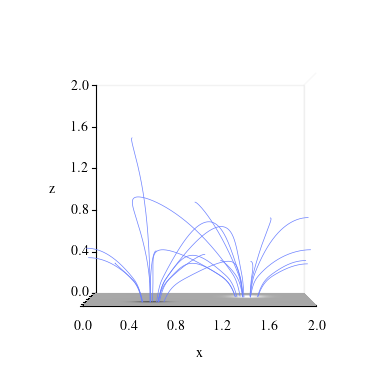

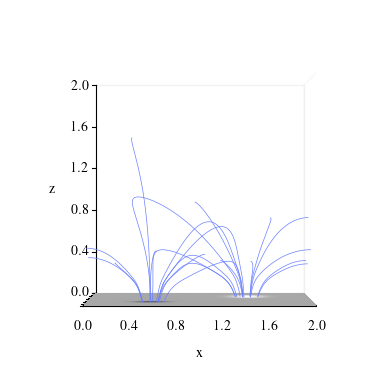

In [23]:
plot(data3d, 'side', save=True, path=folder)

plot(data3dNW, 'side', save=True, path=folder2)

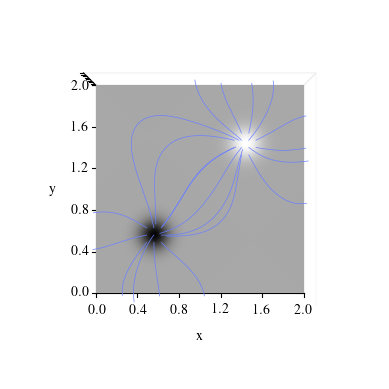

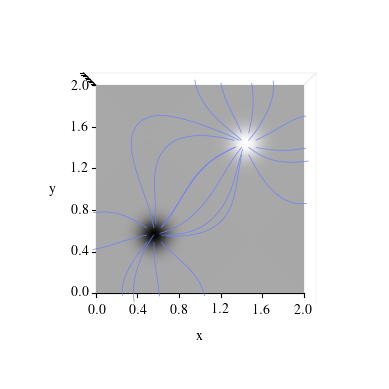

In [24]:
plot(data3d, 'los', save=True, path=folder)

plot(data3dNW, 'los', save=True, path=folder2)

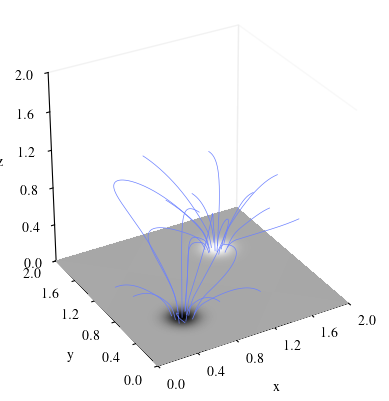

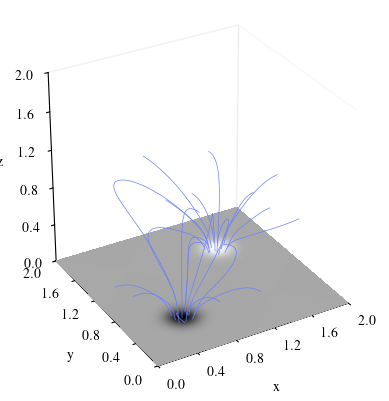

In [25]:
plot(data3d, 'angular', save=True, path=folder)

plot(data3dNW, 'angular', save=True, path=folder2)

In [27]:
a = 0.0
alpha = 0.0
b = 1.0

data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

compare_field3d(data3dNW, data3d)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  1.0 (Reference value:  1.0 )
Cauchy-Schwarz metric:  1.0 (Reference value:  1.0 )
Normalised vector error metric:  3.226076675762149e-16 (Reference value:  0.0 )
Mean vector error metric:  2.117033312554013e-15 (Reference value:  0.0 )
Magnetic energy metric:  1.0 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.993161094224924
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEFFICIENT METRICS
-----------------------------

/Users/lilli/Desktop/mflex/mhsflex/metrics.py:306: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(pres_surface_ref.flatten(), pres_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:310: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(den_surface_ref.flatten(), den_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:314: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(pres_surface_rec.flatten(), pres_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:318: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(den_surface_rec.flatten(), den_surface_ref.flatten()),


In [28]:
a = 0.0
alpha = 0.5
b = 1.0

data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

compare_field3d(data3dNW, data3d)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  1.0000000000000002 (Reference value:  1.0 )
Cauchy-Schwarz metric:  1.0 (Reference value:  1.0 )
Normalised vector error metric:  2.845605127410917e-16 (Reference value:  0.0 )
Mean vector error metric:  1.844814224193439e-15 (Reference value:  0.0 )
Magnetic energy metric:  1.0 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.993161094224924
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEFFICIENT METRICS
--------------

In [29]:
a = 0.22
alpha = 0.5
b = 1.0

data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

compare_field3d(data3dNW, data3d)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9999986309597759 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9999999370129736 (Reference value:  1.0 )
Normalised vector error metric:  0.001657316644420415 (Reference value:  0.0 )
Mean vector error metric:  0.00029700833591174766 (Reference value:  0.0 )
Magnetic energy metric:  1.0001829569702012 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.9931662870159453
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COE

In [30]:
a = 0.44
alpha = 0.5
b = 1.0

data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

compare_field3d(data3dNW, data3d)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9999864578823334 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9999996579174381 (Reference value:  1.0 )
Normalised vector error metric:  0.005285830654102746 (Reference value:  0.0 )
Mean vector error metric:  0.0006126601944483522 (Reference value:  0.0 )
Magnetic energy metric:  1.0018241022203422 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.993161094224924
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEFF